In [87]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.signal import convolve2d
from scipy.io import loadmat

## Problem 1
## (a)

In [9]:
data = pd.read_csv('iris.csv',header=None)

In [10]:
data

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


In [37]:
M1 = data[data.iloc[:,4] == 1].iloc[:,0:4]
M2 = data[data.iloc[:,4] == 2].iloc[:,0:4]
M3 = data[data.iloc[:,4] == 3].iloc[:,0:4]

## (b)

In [38]:
M1.shape

(50, 4)

In [39]:
M2.shape

(50, 4)

In [40]:
M3.shape

(50, 4)

In [42]:
M1.max()

0    5.8
1    4.4
2    1.9
3    0.6
dtype: float64

In [43]:
M1.min()

0    4.3
1    2.3
2    1.0
3    0.1
dtype: float64

In [44]:
M1.mean()

0    5.006
1    3.418
2    1.464
3    0.244
dtype: float64

In [45]:
M2.max()

0    7.0
1    3.4
2    5.1
3    1.8
dtype: float64

In [46]:
M2.min()

0    4.9
1    2.0
2    3.0
3    1.0
dtype: float64

In [47]:
M2.mean()

0    5.936
1    2.770
2    4.260
3    1.326
dtype: float64

In [48]:
M3.max()

0    7.9
1    3.8
2    6.9
3    2.5
dtype: float64

In [49]:
M3.min()

0    4.9
1    2.2
2    4.5
3    1.4
dtype: float64

In [50]:
M3.mean()

0    6.588
1    2.974
2    5.552
3    2.026
dtype: float64

## (c)

Text(0.5, 1.0, 'Iris Data (red=setosa,green=versicolor,blue=virginica)')

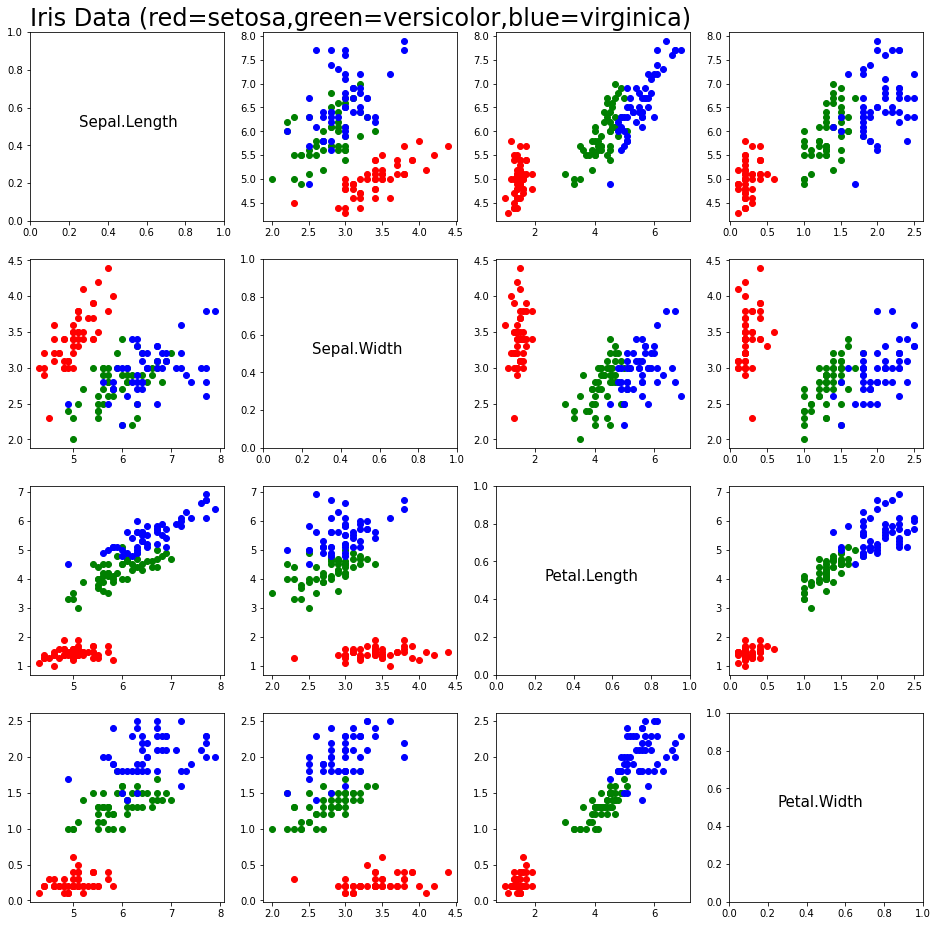

In [82]:
fig, ax = plt.subplots(4,4,figsize=(16,16))
Label = ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']
for i in range(4):
    for j in range(4):
        if i != j: 
            ax[i,j].plot(M1.iloc[:,j],M1.iloc[:,i], 'ro')
            ax[i,j].plot(M2.iloc[:,j],M2.iloc[:,i], 'go')
            ax[i,j].plot(M3.iloc[:,j],M3.iloc[:,i], 'bo')
        else:
            ax[i,j].text(0.25, 0.5, Label[i], size = 15)

ax[0,1].set_title('Iris Data (red=setosa,green=versicolor,blue=virginica)',fontsize=24,color='k')

## Problem 2
## (a)

In [98]:
F = 3                 # The size of our filter
P = int((F - 1)/2)    # Padding Length

H = 4
W = 5

A = np.mat([[4,9,4,5,6],[8,3,6,8,5],[6,8,1,9,0],[5,8,1,1,3]])
# Laplacian Filter
B = np.mat([[0,-1,0],[-1,4,-1],[0,-1,0]])

print("A = \n" + str(A))
print("B = \n" + str(B))

# Now perform 2D convolution
C0 = convolve2d(A,B)
C = C0[P:-P,P:-P]

print("C = \n" + str(C))

A = 
[[4 9 4 5 6]
 [8 3 6 8 5]
 [6 8 1 9 0]
 [5 8 1 1 3]]
B = 
[[ 0 -1  0]
 [-1  4 -1]
 [ 0 -1  0]]
C = 
[[ -1  25  -4   2  14]
 [ 19 -19   8   7   6]
 [  3  14 -20  26 -17]
 [  6  18  -6  -9  11]]


## (b)

In [89]:
A = np.round(10*np.random.rand(H,W),0)
print("A = \n" + str(A))
print("B = \n" + str(B))

# Now perform 2D convolution
C0 = convolve2d(A,B)
C = C0[P:-P,P:-P]

print("C = \n" + str(C))

A = 
[[ 8.  3.  8. 10.  7.]
 [ 1.  5.  6.  4.  9.]
 [ 2.  1.  3.  2.  4.]
 [ 6.  9.  1.  2.  9.]]
B = 
[[ 0 -1  0]
 [-1  4 -1]
 [ 0 -1  0]]
C = 
[[ 28.  -9.  13.  21.   9.]
 [-11.   9.   4. -11.  21.]
 [  0. -15.   2.  -5.  -4.]
 [ 13.  28. -10.  -4.  30.]]


## Problem 3

### $w = [1, 2]^T$ and $b=-1$
### $x^*w +b = 3-1=2$
### $r = -(x^*w +b)/|w|=-2/\sqrt5$

### $x^*$ is over the line and the $r$ is negative. So the plus sign of the calculated value of $r$ means the $x^*$ is close to the origin point or on the side of line close to the origin point. The minus sign of $r$ means the $x^*$ is on the side of line far from the origin point.

In [100]:
F = 3                 # The size of our filter
P = int((F - 1)/2)    # Padding Length

H = 4
W = 5

A = np.mat([[4,9,4,5,6],[8,3,6,8,5],[6,8,1,9,0],[5,8,1,1,3]])
B = np.mat([[1,0,-1],[2,0,-2],[1,0,-1]])

print("A = \n" + str(A))
print("B = \n" + str(B))

# Now perform 2D convolution
C0 = convolve2d(A,B)
C = C0[P:-P,P:-P]

print("C = \n" + str(C))

A = 
[[4 9 4 5 6]
 [8 3 6 8 5]
 [6 8 1 9 0]
 [5 8 1 1 3]]
B = 
[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]
C = 
[[ 21  -2  -3   3 -18]
 [ 23  -9   7  -1 -30]
 [ 27 -16   0  -1 -27]
 [ 24 -13 -13   3 -11]]


In [95]:
C0

array([[  4,   9,   0,  -4,   2,  -5,  -6],
       [ 16,  21,  -2,  -3,   3, -18, -17],
       [ 26,  23,  -9,   7,  -1, -30, -16],
       [ 25,  27, -16,   0,  -1, -27,  -8],
       [ 16,  24, -13, -13,   3, -11,  -6],
       [  5,   8,  -4,  -7,   2,  -1,  -3]])